<a href="https://colab.research.google.com/github/manojmandal27/text_mining_product_review/blob/main/Product_reviewAZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install nltk
#!pip install spacy

In [3]:
import pandas as pd
import nltk
import spacy
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [4]:
review_data=pd.read_csv("https://github.com/manojmandal27/NLP_Classical_ML/raw/main/Product_Review_Data_AZ.csv")
review_data.sample(10)

,Id,Review,Sentiment
1014,1015,I was disgusted because I was pretty sure that...,0
1301,1302,Please stay away from the shrimp stir fried no...,0
50,51,Not loud enough and doesn't turn on like it sh...,0
1010,1011,Service was very prompt.,1
1749,1750,Wonderful lil tapas and the ambience made me f...,1
857,858,(It works!),1
1001,1002,Crust is not good.,0
975,976,It is the best charger I have seen on the mark...,1
847,848,Very unreliable service from T-mobile !,0
718,719,It was a great phone.,1


In [7]:
contra_Expan_Dict = {"ain`t": "am not","aren`t": "are not","can`t": "cannot","can`t`ve": "cannot have","`cause": "because",
"could`ve": "could have","couldn`t": "could not","couldn`t`ve": "could not have","didn`t": "did not",
"doesn`t": "does not","don`t": "do not","hadn`t": "had not","hadn`t`ve": "had not have","hasn`t": "has not",
"haven`t": "have not","he`d": "he would","he`d`ve": "he would have","he`ll": "he will","he`ll`ve": "he will have",
"he`s": "he is","how`d": "how did","how`d`y": "how do you","how`ll": "how will",
"how`s": "how does","i`d": "i would","i`d`ve": "i would have","i`ll": "i will","i`ll`ve": "i will have","i`m": "i am",
"i`ve": "i have","isn`t": "is not","it`d": "it would","it`d`ve": "it would have","it`ll": "it will","it`ll`ve": "it will have",
"it`s": "it is","let`s": "let us","ma`am": "madam","mayn`t": "may not","might`ve": "might have","mightn`t": "might not",
"mightn`t`ve": "might not have","must`ve": "must have","mustn`t": "must not","mustn`t`ve": "must not have","needn`t": "need not","needn`t`ve": "need not have",
"o`clock": "of the clock","oughtn`t": "ought not","oughtn`t`ve": "ought not have","shan`t": "shall not",
"sha`n`t": "shall not","shan`t`ve": "shall not have","she`d": "she would",
"she`d`ve": "she would have","she`ll": "she will","she`ll`ve": "she will have",
"she`s": "she is","should`ve": "should have","shouldn`t": "should not","shouldn`t`ve": "should not have","so`ve": "so have","so`s": "so is",
"that`d": "that would","that`d`ve": "that would have","that`s": "that is","there`d": "there would","there`d`ve": "there would have","there`s": "there is",
"they`d": "they would","they`d`ve": "they would have","they`ll": "they will","they`ll`ve": "they will have","they`re": "they are","they`ve": "they have",
"to`ve": "to have","wasn`t": "was not"," u ": " you "," ur ": " your "," n ": " and ","won`t": "would not",
"dis": "this","bak": "back","brng": "bring"}

def expanded_form(x):
  if x in contra_Expan_Dict.keys():
    return(contra_Expan_Dict[x])
  else:
    return(x)

from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do"})

import re
def clean_with_re(x):
  x=str(x)
  x=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ", x) #Remove URLs
  x=re.sub(r'[^\w ]+', "", x) # Remove Punctuation-1
  x=re.sub(r"[,!@&\'?\.$%_]"," ", x) # Remove Punctuation-2
  x=re.sub(r"\d+"," ", x) #Remove digits
  return(x)

spacy_model = spacy.load('en_core_web_sm')

def pre_processing(input_data, text_col):
  input_data["text_col_clean"]=input_data[text_col].apply(lambda x:str(x).lower())
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:clean_with_re(x))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x: " ".join(x) )
  print(input_data[[text_col,"text_col_clean"]])


In [8]:
pre_processing(input_data=review_data, text_col="Review")

                                                 Review  \
0     So there is no way for me to plug it in here i...   
1                           Good case, Excellent value.   
2                                Great for the jawbone.   
3     Tied to charger for conversations lasting more...   
4                                     The mic is great.   
...                                                 ...   
1995  I think food should have flavor and texture an...   
1996                           Appetite instantly gone.   
1997  Overall I was not impressed and would not go b...   
1998  The whole experience was underwhelming, and I ...   
1999  Then, as if I hadn't wasted enough of my life ...   

                                         text_col_clean  
0                                    way plug converter  
1                             good case excellent value  
2                                         great jawbone  
3         tie charger conversation minutesmajor problem  
4

In [9]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

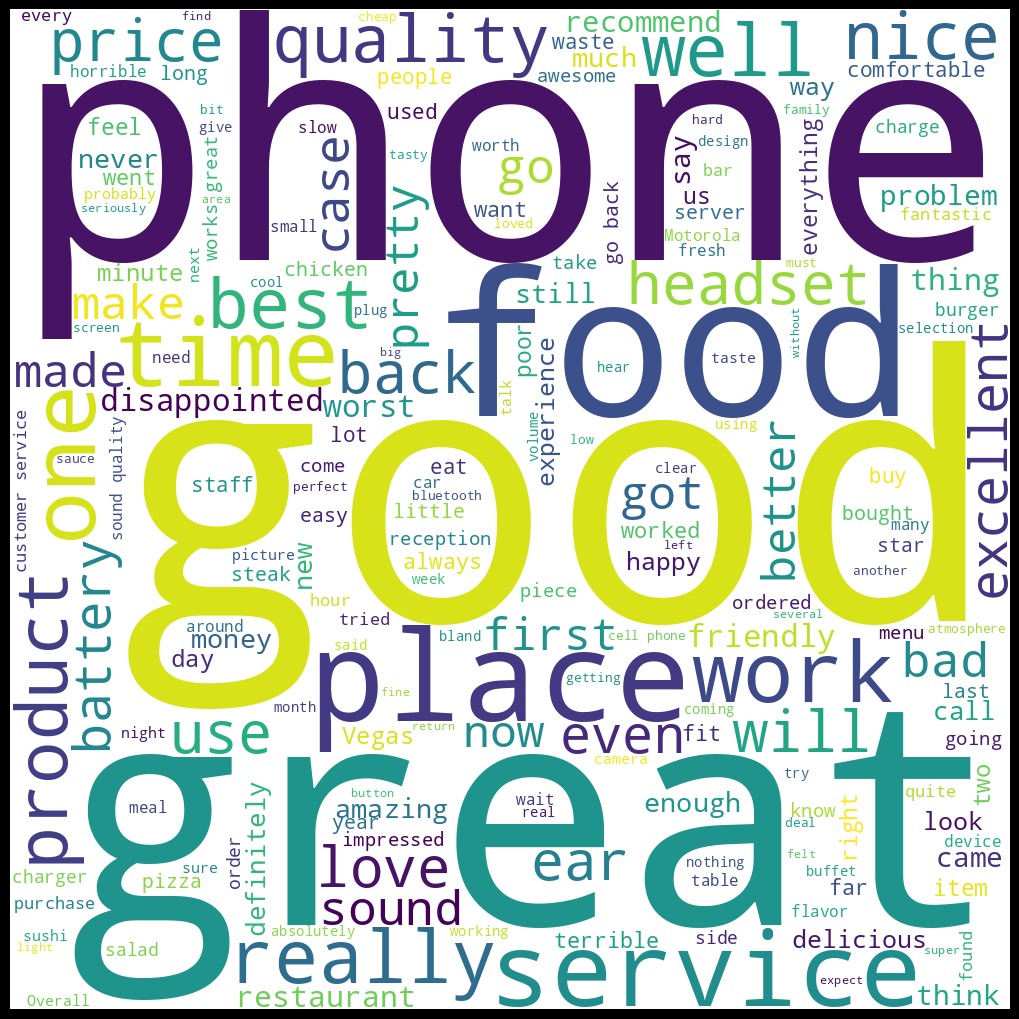

In [10]:
wc = WordCloud(background_color='white', width=1000, height=1000, margin=2).generate(" ".join(review_data["Review"]))
plt.figure(figsize=(10, 10), facecolor='k', edgecolor='k')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df= 2)
dtm_v1 = pd.DataFrame(countvec1.fit_transform(review_data['text_col_clean']).toarray(), columns=countvec1.get_feature_names_out(), index=None)
print(dtm_v1.shape)
dtm_v1


(2000, 982)


,ability,able,absolutely,accept,access,acknowledge,activate,actually,adapter,add,...,worst,worth,worthless,worthwhile,wow,wrap,wrong,year,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              2000 non-null   int64 
 1   Review          2000 non-null   object
 2   Sentiment       2000 non-null   int64 
 3   text_col_clean  2000 non-null   object
dtypes: int64(2), object(2)
memory usage: 62.6+ KB


In [13]:
review_data

,Id,Review,Sentiment,text_col_clean
0,1,So there is no way for me to plug it in here i...,0,way plug converter
1,2,"Good case, Excellent value.",1,good case excellent value
2,3,Great for the jawbone.,1,great jawbone
3,4,Tied to charger for conversations lasting more...,0,tie charger conversation minutesmajor problem
4,5,The mic is great.,1,mic great
...,...,...,...,...
1995,1996,I think food should have flavor and texture an...,0,think food flavor texture lack
1996,1997,Appetite instantly gone.,0,appetite instantly
1997,1998,Overall I was not impressed and would not go b...,0,overall impressed
1998,1999,"The whole experience was underwhelming, and I ...",0,experience underwhelming think ninja sushi time


In [14]:
review_data['Sentiment'].value_counts()

,count
Sentiment,
0,1000
1,1000


In [15]:
dtm_v1['sentiment_label']=review_data['Sentiment']

#remove neutrals
dtm_v1=dtm_v1[dtm_v1['sentiment_label'] != "neutral"]
print(dtm_v1['sentiment_label'].value_counts())

sentiment_label
0    1000
1    1000
Name: count, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

X=dtm_v1.drop(['sentiment_label'], axis=1)
y=dtm_v1['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 982)
(1600,)
(400, 982)
(400,)


In [17]:
from sklearn.naive_bayes import MultinomialNB
senti_model_Amazon = MultinomialNB()
senti_model_Amazon.fit(X_train, y_train)

MultinomialNB()

In [18]:
print("Train Accuracy", senti_model_Amazon.score(X_train,y_train))
print("Test Accuracy", senti_model_Amazon.score(X_test,y_test))

Train Accuracy 0.89625
Test Accuracy 0.81


In [19]:

'''
Fine-tune alpha - Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
P(W*|Y=1) = P(W*,Y=1)/P(Y=1)
What if W* is not present at training?
P(W*|Y=1)=Freq of W* present in class y=1 / Freq of class1
P(W*|Y=1)= 0/Freq of class1
Then we may need to add an alpha to both numerator and denominator
P(W*|Y=1) = (P(W*,Y=1)+alpha)/(P(Y=1)+(total classes)*alpha)
If alpha is too low or zero ==> Overfitting on train data
If alpha is too high ==> Then ignoring too much of training data - Underfitting
'''
senti_model_Amazon = MultinomialNB(alpha=100)
senti_model_Amazon.fit(X_train, y_train)
print("Train Accuracy", senti_model_Amazon.score(X_train,y_train))
print("Test Accuracy", senti_model_Amazon.score(X_test,y_test))

Train Accuracy 0.8075
Test Accuracy 0.7625


In [20]:

#Prediction
pred_sentiment=senti_model_Amazon.predict(X_test)
print(pred_sentiment)

[0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1
 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0
 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1
 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0]


In [28]:
t1 ="Very bad about the quality of the product. They need to add value into it "
t2 ="Why order product from here. You will regret it. "
t3 = "This restaurent is super good. I am a big fan of their menu "
tweet_list=[t1,t2,t3]

new_comment= pd.DataFrame({"text":tweet_list})
#Spelling Correction
from textblob import TextBlob
new_comment["text_corrected"]=new_comment["text"].apply(lambda x:"".join(TextBlob(x).correct()))
pre_processing(input_data=new_comment, text_col="text_corrected")

                                      text_corrected  \
0  Very bad about the quality of the product. The...   
1  Why order product from here. You will regret it.    
2  His restaurant is super good. I am a big fan o...   

                       text_col_clean  
0       bad quality product add value  
1                order product regret  
2  restaurant super good big fan menu  


In [29]:
countvec = CountVectorizer()
dtm_newcomment = pd.DataFrame(countvec.fit_transform(new_comment['text_col_clean']).toarray(), columns=countvec.get_feature_names_out(), index=None)
#print(dtm_newcomment)
#Now we need to fetch all the columns from the original DTM and fill them with zeros. Fill "really" and "amazed" with 1.

dtm_v2=dtm_v1.drop(["sentiment_label"],axis=1)
dtm_newcomment_final=pd.DataFrame(columns=dtm_v2.columns.values)
dtm_newcomment_final=pd.concat([dtm_newcomment_final, dtm_newcomment])
dtm_newcomment_final=dtm_newcomment_final.fillna(0)

In [30]:
print("****Make sure that New DTM and old DTM have same number of columns***")
print("New DTM Shape", dtm_newcomment_final.shape)
print("Overall DTM Shape",dtm_v2.shape)

New_words=[t for t in dtm_newcomment_final.columns.values if t not in dtm_v2.columns.values]
print("Count of new words =>", len(New_words))
print("New words are => ", New_words)


****Make sure that New DTM and old DTM have same number of columns***
New DTM Shape (3, 982)
Overall DTM Shape (2000, 982)
Count of new words => 0
New words are =>  []


In [31]:
result=pd.DataFrame()
result["text"]=new_comment["text"]
result["Sentiment"] = senti_model_Amazon.predict(dtm_newcomment_final)
print(result)
print("In the training data - \n 1: Positive \n 0: Negative \n")

                                                text  Sentiment
0  Very bad about the quality of the product. The...          0
1  Why order product from here. You will regret it.           0
2  This restaurent is super good. I am a big fan ...          1
In the training data - 
 1: Positive 
 0: Negative 

